In [ ]:
#By Ehtesham Anwar
#Analyses correlations between domain wall thickness, roughness, and curvature in 3DPFM Data

In [ ]:
!pip install matplotlib-scalebar
import h5py
import os

from matplotlib.colors import hsv_to_rgb
from matplotlib_scalebar.scalebar import ScaleBar

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
file_loc = r'/content/Image.hf5'
base_filename = 'Image'
log_filename = 'Log_3DPFM'

In [ ]:
with (h5py.File(file_loc, 'r')) as f:
    ux = f['3DPFM/ux'][:]
    uy = f['3DPFM/uy'][:]
    uz = f['3DPFM/uz'][:]

    priority = ['B', 'C', 'A', 'E']
    Cnt = next((x for x in priority if x in f.keys()), None)

    topo = f[Cnt+'/Channel_000/Channel_000/Channel_000'][:]
    scale = f[Cnt+'/Channel_000/Channel_000/original_metadata'].attrs['FastScanSize']/f[Cnt+'/Channel_000/Channel_000/original_metadata'].attrs['PointsLines']

U_mag = np.sqrt(np.abs(ux)**2+np.abs(uy)**2+np.abs(uz)**2)
U_mag_max = min(U_mag.max(), 3e-9)

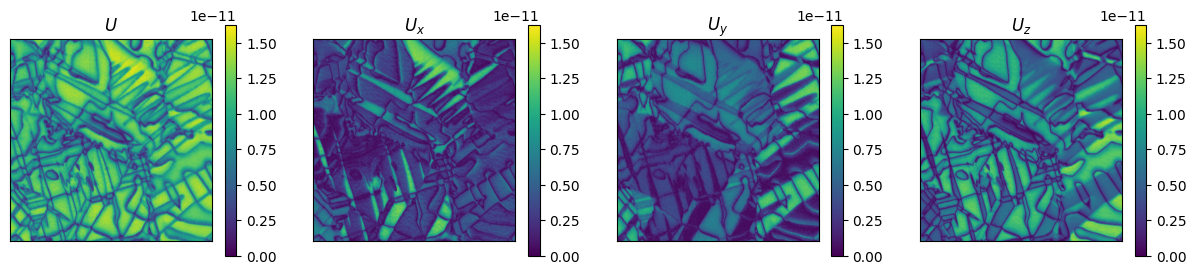

In [ ]:
plt.figure(figsize = (15,3))
param = [U_mag, np.abs(ux), np.abs(uy), np.abs(uz)]
title = ['$U$', '$U_x$', '$U_y$', '$U_z$']
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.title(title[i])
    plt.imshow(param[i], vmin = 0, vmax = U_mag_max)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
plt.savefig(base_filename+'_amplitude.png', dpi = 180)

<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-3075977014.py:3: SyntaxWarning: invalid escape sequence '\p'
  title = ['$\phi_x$', '$\phi_y$', '$\phi_z$']
/tmp/ipython-input-3075977014.py:3: SyntaxWarning: invalid escape sequence '\p'
  title = ['$\phi_x$', '$\phi_y$', '$\phi_z$']
/tmp/ipython-input-3075977014.py:3: SyntaxWarning: invalid escape sequence '\p'
  title = ['$\phi_x$', '$\phi_y$', '$\phi_z$']


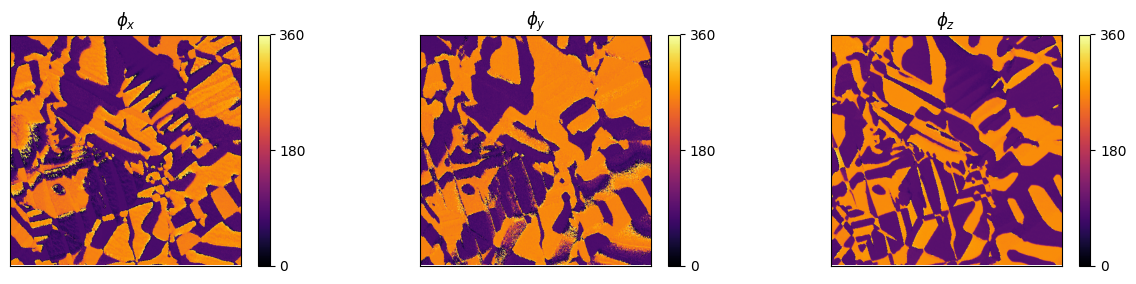

In [ ]:
plt.figure(figsize = (15,3))
param = [(np.degrees(np.angle(ux))+90)%360, (np.degrees(np.angle(uy))+90)%360, (np.degrees(np.angle(uz))+90)%360]
title = ['$\phi_x$', '$\phi_y$', '$\phi_z$']
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.title(title[i])
    plt.imshow(param[i], cmap = 'inferno', vmin=0, vmax = 360)
    plt.colorbar(ticks = [0,180,360])
    plt.xticks([])
    plt.yticks([])
plt.savefig(base_filename+'_phase.png', dpi = 180)

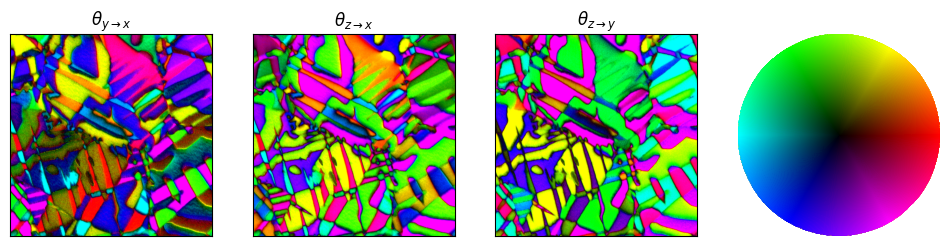

In [ ]:
mag = np.sqrt(np.abs(ux)**2+np.abs(uy)**2+np.abs(uz)**2)

fig = plt.figure(figsize = (12,3))
pairs = [[uy, ux],[uz, ux],[uz, uy]]
pair_name = [r'$\theta_{y \to x}$', r'$\theta_{z \to x}$', r'$\theta_{z \to y}$']

for i, pair in enumerate(pairs):
    plt.subplot(1,4,i+1)
    # Compute angle (hue) and magnitude (brightness)
    angle = np.arctan2(np.real(pair[0]), np.real(pair[1]))   # radians
    magnitude = np.sqrt(np.abs(pair[0])**2 + np.abs(pair[1])**2)

    # Normalize hue [0,1] and magnitude [0,1]
    H = (np.degrees(angle) % 360) / 360.0
    S = np.ones_like(H)  # keep full saturation
    V = (2*magnitude) / U_mag_max

    # Stack into HSV and convert to RGB
    HSV = np.stack((H, S, V), axis=-1)
    RGB = hsv_to_rgb(HSV)

    # Show image
    plt.imshow(RGB)
    plt.xticks([])
    plt.yticks([])
    plt.title(pair_name[i])


# Create polar coordinates
n = 500
theta = np.linspace(0, 2 * np.pi, n)   # angle
r = np.linspace(0, 1, n)               # magnitude normalized

# Create a meshgrid for polar plot
Theta, R = np.meshgrid(theta, r)

# Map angle to hue (0–1 normalized from theta)
H = Theta / (2 * np.pi)

# Map radius to brightness (value channel in HSV)
S = np.ones_like(R)    # full saturation
V = R                  # brightness proportional to magnitude

# Combine HSV -> RGB
HSV = np.stack((H, S, V), axis=-1)
RGB = hsv_to_rgb(HSV)

# Plot in polar coordinates
ax = fig.add_subplot(1, 4, 4, polar=True)
ax.set_axis_off()  # hide grid/axes

# Use pcolormesh to draw colour field
ax.pcolormesh(Theta, R, V, color=RGB.reshape(-1,3), shading='auto')

plt.savefig(base_filename+'_polar-angle.png', dpi = 180)
plt.show()

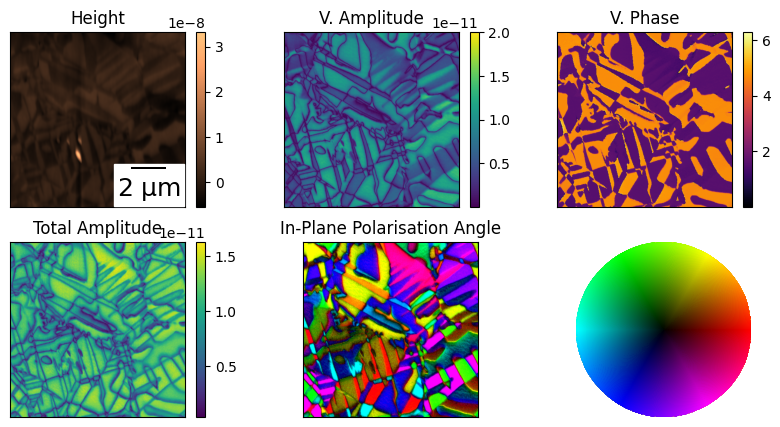

In [ ]:
mag = np.sqrt(np.abs(ux)**2+np.abs(uy)**2+np.abs(uz)**2)

fig = plt.figure(figsize = (10,5))
plt.subplot(2,3,1)
plt.title('Height')
plt.imshow(topo, cmap = 'copper', vmin = np.min(topo), vmax = np.max(topo))
plt.xticks([])
plt.yticks([])
plt.colorbar()
scalebar = ScaleBar(scale, 'm', location = 'lower right', font_properties={'size':18})
plt.gca().add_artist(scalebar)
plt.subplot(2,3,2)
plt.title('V. Amplitude')
plt.imshow(np.abs(uz), vmax = 2e-11)
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.subplot(2,3,3)
plt.title('V. Phase')
plt.imshow((np.angle(uz)+np.pi/2)%(2*np.pi), cmap = 'inferno')
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.subplot(2,3,4)
plt.title('Total Amplitude')
plt.imshow(U_mag, vmax = U_mag_max)#, #alpha = np.sqrt(np.abs(ux)**2+np.abs(uy)**2)/mag)
plt.xticks([])
plt.yticks([])
plt.colorbar()

plt.subplot(2,3,5)
plt.title('In-Plane Polarisation Angle')

# Compute angle (hue) and magnitude (brightness)
angle = np.arctan2(np.real(uy), np.real(ux))   # radians
magnitude = np.sqrt(np.abs(uy)**2 + np.abs(ux)**2)

# Normalize hue [0,1] and magnitude [0,1]
H = (np.degrees(angle) % 360) / 360.0
S = np.ones_like(H)  # keep full saturation
V = (2*magnitude) / U_mag_max

# Stack into HSV and convert to RGB
HSV = np.stack((H, S, V), axis=-1)
RGB = hsv_to_rgb(HSV)

# Show image
plt.imshow(RGB)#, extent=[x.min(), x.max(), y.min(), y.max()])
plt.xticks([])
plt.yticks([])
#plt.colorbar()

# Create polar coordinates
n = 500
theta = np.linspace(0, 2 * np.pi, n)   # angle
r = np.linspace(0, 1, n)               # magnitude normalized

# Create a meshgrid for polar plot
Theta, R = np.meshgrid(theta, r)

# Map angle to hue (0–1 normalized from theta)
H = Theta / (2 * np.pi)

# Map radius to brightness (value channel in HSV)
S = np.ones_like(R)    # full saturation
V = R                  # brightness proportional to magnitude

# Combine HSV -> RGB
HSV = np.stack((H, S, V), axis=-1)
RGB = hsv_to_rgb(HSV)

ax = fig.add_subplot(2, 3, 6, polar=True)
ax.set_axis_off()  # hide grid/axes

# Use pcolormesh to draw colour field
ax.pcolormesh(Theta, R, V, color=RGB.reshape(-1,3), shading='auto')

plt.savefig(base_filename+'_summary.png', dpi = 180)

Spearman correlation matrix:
           Roughness  Curvature  Thickness
Roughness   1.000000  -0.039907   0.564804
Curvature  -0.039907   1.000000  -0.009063
Thickness   0.564804  -0.009063   1.000000


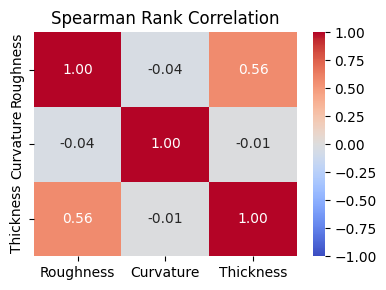

In [ ]:
# ================================
# Spearman correlation between descriptors
# ================================
from scipy.stats import spearmanr
from scipy.ndimage import gaussian_filter, maximum_filter, minimum_filter
import pandas as pd
import seaborn as sns

# 1) Compute descriptors

# Roughness: local std of topo using Gaussian smoothing
def local_roughness(topo, sigma=3):
    topo_smooth = gaussian_filter(topo, sigma=sigma)
    roughness_map = np.sqrt(gaussian_filter((topo - topo_smooth)**2, sigma=sigma))
    return roughness_map

roughness_map = local_roughness(topo, sigma=3)

# Curvature: Laplacian (second derivatives)
def local_curvature(topo, sigma=1):
    topo_smooth = gaussian_filter(topo, sigma=sigma)
    d2x = np.gradient(np.gradient(topo_smooth, axis=1), axis=1)
    d2y = np.gradient(np.gradient(topo_smooth, axis=0), axis=0)
    curvature_map = d2x + d2y
    return curvature_map

curvature_map = local_curvature(topo, sigma=1)

# Thickness: local height difference in a window
def local_thickness(topo, window=5):
    max_local = maximum_filter(topo, size=window)
    min_local = minimum_filter(topo, size=window)
    thickness_map = max_local - min_local
    return thickness_map

thickness_map = local_thickness(topo, window=5)

# 2) Flatten arrays for correlation calculation
rough_flat = roughness_map.flatten()
curv_flat = curvature_map.flatten()
thick_flat = thickness_map.flatten()

# Remove NaNs/Infs
valid_mask = (~np.isnan(rough_flat)) & (~np.isnan(curv_flat)) & (~np.isnan(thick_flat))
rough_flat = rough_flat[valid_mask]
curv_flat = curv_flat[valid_mask]
thick_flat = thick_flat[valid_mask]

# 3) Spearman correlation matrix
data_dict = {
    'Roughness': rough_flat,
    'Curvature': curv_flat,
    'Thickness': thick_flat
}
df = pd.DataFrame(data_dict)

corr_matrix = df.corr(method='spearman')

print("Spearman correlation matrix:")
print(corr_matrix)

# 4) Plot heatmap
plt.figure(figsize=(4,3))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Rank Correlation')
plt.tight_layout()
plt.show()


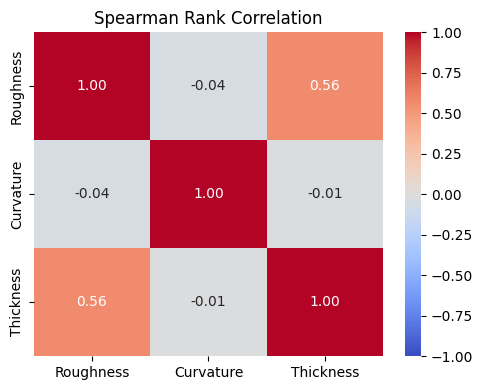

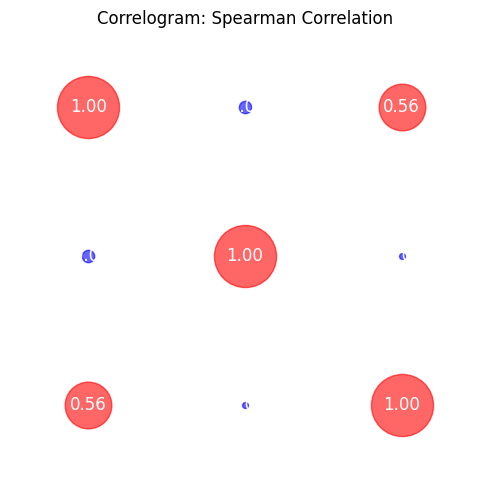

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Use previous Spearman correlation matrix: corr_matrix
labels = corr_matrix.columns
n = len(labels)

# -------------------------------
# 1) Classic heatmap with annotation
plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Rank Correlation')
plt.tight_layout()
plt.show()

# -------------------------------
# 2) Correlogram style (circle size + color)
plt.figure(figsize=(5,5))
plt.axis('off')

# Circle positions
x, y = np.meshgrid(np.arange(n), np.arange(n))
x = x.flatten()
y = y.flatten()
corr_values = corr_matrix.to_numpy().flatten()

# Draw circles
for xi, yi, c in zip(x, y, corr_values):
    size = abs(c) * 2000  # adjust scaling factor
    color = 'red' if c > 0 else 'blue'
    plt.scatter(xi, yi, s=size, color=color, alpha=0.6)
    plt.text(xi, yi, f"{c:.2f}", ha='center', va='center', color='white', fontsize=12)

plt.xticks(np.arange(n), labels, rotation=45)
plt.yticks(np.arange(n), labels)
plt.title('Correlogram: Spearman Correlation')
plt.xlim(-0.5, n-0.5)
plt.ylim(-0.5, n-0.5)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive # Import drive
import os # Import os

# Mount Google Drive and create directory if it doesn't exist
drive.mount('/content/drive', force_remount=True)
heatmap_dir = '/content/drive/MyDrive/Hackathon2025'
os.makedirs(heatmap_dir, exist_ok=True)

# Use previous Spearman correlation matrix: corr_matrix
labels = corr_matrix.columns
n = len(labels)

# -------------------------------
# 1) Classic heatmap with annotation
plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Rank Correlation')
plt.tight_layout()

# Save heatmap
heatmap_path = os.path.join(heatmap_dir, 'spearman_heatmap.png')
plt.savefig(heatmap_path, dpi=300, bbox_inches='tight')
print(f"Heatmap saved to {heatmap_path}")

plt.show()

# -------------------------------
# 2) Correlogram style (circle size + color)
plt.figure(figsize=(5,5))
plt.axis('off')

# Circle positions
x, y = np.meshgrid(np.arange(n), np.arange(n))
x = x.flatten()
y = y.flatten()
corr_values = corr_matrix.to_numpy().flatten()

# Draw circles
for xi, yi, c in zip(x, y, corr_values):
    size = abs(c) * 2000  # adjust scaling factor
    color = 'red' if c > 0 else 'blue'
    plt.scatter(xi, yi, s=size, color=color, alpha=0.6)
    plt.text(xi, yi, f"{c:.2f}", ha='center', va='center', color='white', fontsize=12)

plt.xticks(np.arange(n), labels, rotation=45)
plt.yticks(np.arange(n), labels)
plt.title('Correlogram: Spearman Correlation')
plt.xlim(-0.5, n-0.5)
plt.ylim(-0.5, n-0.5)
plt.gca().invert_yaxis()
plt.tight_layout()

# Save correlogram
correlogram_path = os.path.join(heatmap_dir, 'spearman_correlogram.png') # Use heatmap_dir
plt.savefig(correlogram_path, dpi=300, bbox_inches='tight')
print(f"Correlogram saved to {correlogram_path}")

plt.show()

MessageError: Error: credential propagation was unsuccessful

Mounted at /content/drive
Figure saved to /content/drive/MyDrive/Hackathon2025/descriptor_correlation.png


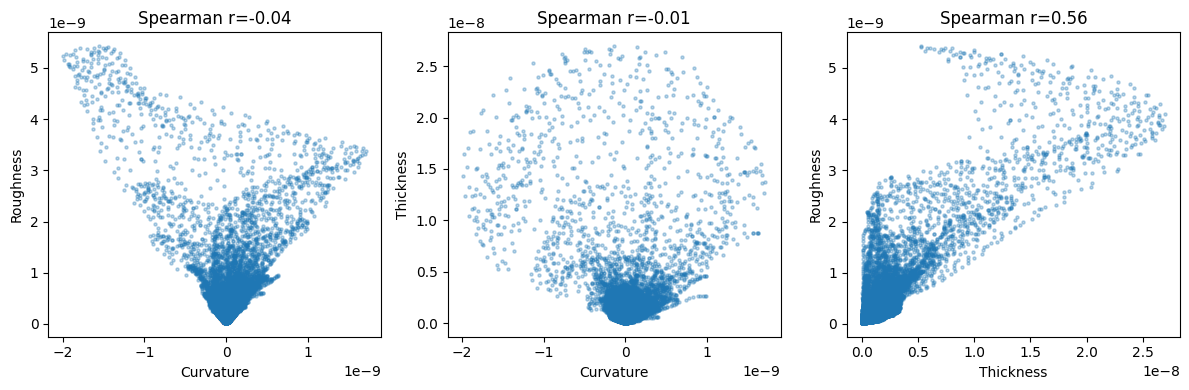

In [ ]:
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
from google.colab import drive

# Flatten arrays and remove NaNs
rough_flat = roughness_map.flatten()
curv_flat = curvature_map.flatten()
thick_flat = thickness_map.flatten()

valid_mask = (~np.isnan(rough_flat)) & (~np.isnan(curv_flat)) & (~np.isnan(thick_flat))
rough_flat = rough_flat[valid_mask]
curv_flat = curv_flat[valid_mask]
thick_flat = thick_flat[valid_mask]

# Define pairs
pairs = [
    (curv_flat, rough_flat, 'Curvature', 'Roughness'),
    (curv_flat, thick_flat, 'Curvature', 'Thickness'),
    (thick_flat, rough_flat, 'Thickness', 'Roughness')
]

# Plot
plt.figure(figsize=(12,4))
for i, (x, y, xlabel, ylabel) in enumerate(pairs):
    corr, pval = spearmanr(x, y)
    plt.subplot(1, 3, i+1)
    plt.scatter(x, y, alpha=0.3, s=5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"Spearman r={corr:.2f}")

plt.tight_layout()

# -----------------------------
# Mount Google Drive
drive.mount('/content/drive')

# Create the directory if it doesn't exist
import os
save_dir = '/content/drive/MyDrive/Hackathon2025/'
os.makedirs(save_dir, exist_ok=True)

# Save figure
save_path = os.path.join(save_dir, 'descriptor_correlation.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved to {save_path}")

# Show the figure
plt.show()

Spearman correlation (Roughness vs Curvature) = -0.040, p-value = 7.275e-93


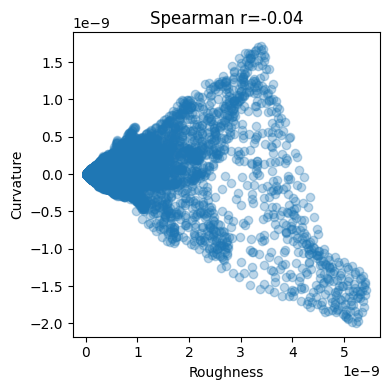

In [ ]:
from scipy.stats import spearmanr

# Example: Roughness vs Curvature
# flatten maps if they are 2D
rough_flat = roughness_map.flatten()
curv_flat = curvature_map.flatten()

# remove NaNs or infinities
valid_mask = (~np.isnan(rough_flat)) & (~np.isnan(curv_flat))
rough_flat = rough_flat[valid_mask]
curv_flat = curv_flat[valid_mask]

# Spearman rank correlation
corr, pval = spearmanr(rough_flat, curv_flat)
print(f"Spearman correlation (Roughness vs Curvature) = {corr:.3f}, p-value = {pval:.3e}")

# -------------------------------
# Optional: Scatter plot with trend
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.scatter(rough_flat, curv_flat, alpha=0.3)
plt.xlabel('Roughness')
plt.ylabel('Curvature')
plt.title(f'Spearman r={corr:.2f}')
plt.tight_layout()
plt.show()


Heatmap saved to: /content/drive/MyDrive/Hackathon2025/Image_spearman_heatmap.png


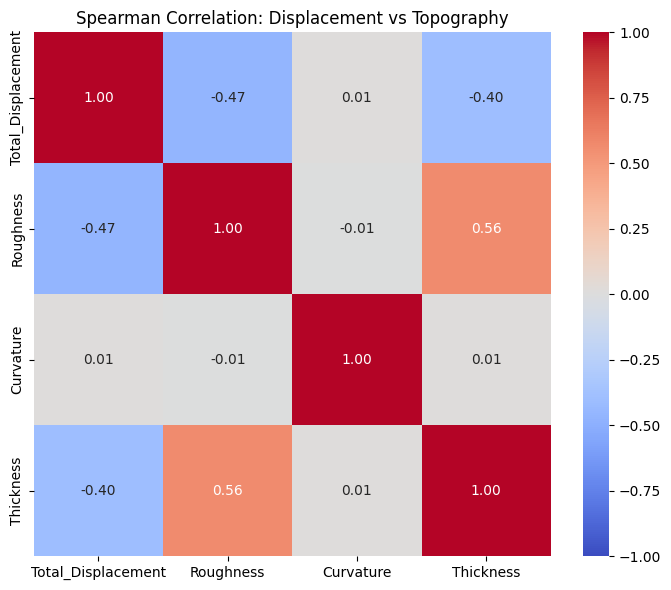

Correlation CSV saved to: /content/drive/MyDrive/Hackathon2025/Image_correlation_matrix.csv


In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from scipy.ndimage import gaussian_filter, maximum_filter, minimum_filter
from skimage.transform import resize

# 1. Define the Save Path
save_path = "/content/drive/MyDrive/Hackathon2025"
if not os.path.exists(save_path):
    os.makedirs(save_path)

# 2. Align Topography with U_mag
# ux.shape is typically (511, 511) while topo might be (512, 512)
topo_resized = resize(topo, ux.shape, preserve_range=True)

# 3. Compute Topographic Descriptors on the aligned map
def get_descriptors(t):
    # Roughness
    t_smooth = gaussian_filter(t, sigma=3)
    rough = np.sqrt(gaussian_filter((t - t_smooth)**2, sigma=3))

    # Curvature (Laplacian)
    d2x = np.gradient(np.gradient(t_smooth, axis=1), axis=1)
    d2y = np.gradient(np.gradient(t_smooth, axis=0), axis=0)
    curv = d2x + d2y

    # Thickness (Local Height Range)
    thick = maximum_filter(t, size=5) - minimum_filter(t, size=5)

    return rough, curv, thick

rough_map, curv_map, thick_map = get_descriptors(topo_resized)

# 4. Flatten and Create DataFrame
u_mag_flat = U_mag.flatten()
rough_flat = rough_map.flatten()
curv_flat = curv_map.flatten()
thick_flat = thick_map.flatten()

# Filter out any potential NaNs to ensure clean correlation
valid_mask = ~np.isnan(u_mag_flat) & ~np.isnan(rough_flat)

df_final = pd.DataFrame({
    'Total_Displacement': u_mag_flat[valid_mask],
    'Roughness': rough_flat[valid_mask],
    'Curvature': curv_flat[valid_mask],
    'Thickness': thick_flat[valid_mask]
})

# 5. Compute Spearman Correlation
corr_matrix = df_final.corr(method='spearman')

# 6. Plot and Save the Heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation: Displacement vs Topography')
plt.tight_layout()

# Save Image
heatmap_file = os.path.join(save_path, f"{base_filename}_spearman_heatmap.png")
plt.savefig(heatmap_file, dpi=300)
print(f"Heatmap saved to: {heatmap_file}")
plt.show()

# 7. Save the Matrix to CSV
csv_file = os.path.join(save_path, f"{base_filename}_correlation_matrix.csv")
corr_matrix.to_csv(csv_file)
print(f"Correlation CSV saved to: {csv_file}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def jet_with_zero_transparent(n_colors=256):
    """
    Create a 'jet' colormap where only the lowest value (0) is fully transparent,
    and all other values are fully opaque.
    """
    base = plt.get_cmap('jet', n_colors)
    colors = base(np.arange(n_colors))

    # Make first color (lowest value) transparent, rest fully opaque
    colors[:, -1] = 1.0
    colors[:20, -1] = 0.0

    return ListedColormap(colors)


def unitize(ux, uy, uz, eps=1e-12):
    ux = np.asanyarray(ux, dtype=float)
    uy = np.asanyarray(uy, dtype=float)
    uz = np.asanyarray(uz, dtype=float)
    U = np.stack((ux, uy, uz), axis=-1)  # (H,W,3)
    mag = np.linalg.norm(U, axis=-1)
    valid = mag > eps
    mag_safe = mag.copy()
    mag_safe[~valid] = 1.0
    U_dir = U / mag_safe[..., None]
    U_dir[~valid] = 0.0
    return U_dir, valid

def angle_between_unit(a, b):
    # a,b shape (...,3)
    dot = np.sum(a * b, axis=-1)
    dot = np.clip(dot, -1.0, 1.0)
    return np.arccos(dot)

def most_common_opposite_angle_map_discrete(
        ux, uy, uz,
        radius=3,
        bin_width=np.pi/36,   # default: 5 degree bins
        min_pairs_required=4,
        eps=1e-12
    ):
    """
    For each pixel compute the most common angle (radians) between opposite discrete pixel pairs
    within integer offsets in a radius.

    Parameters
    ----------
    ux, uy, uz : 2D arrays (complex or real)
        Vector field components.
    radius : int
        Max integer radius to consider. Offsets considered are all integer (dy,dx) with
        dy^2 + dx^2 <= radius^2 and not (0,0).
    bin_width : float
        Histogram bin width in radians (must evenly divide pi for convenience but not required).
    min_pairs_required : int
        Minimum valid opposite pairs required to return a mode; otherwise result is np.nan.
    eps : float
        Small value to avoid division by zero when normalizing.

    Returns
    -------
    mode_map : float array (H,W)
        Per-pixel most common angle (radians) — center of modal bin; np.nan where insufficient pairs.
    modal_count_map : int array (H,W)
        Count of samples inside the modal bin for each pixel.
    total_pairs_map : int array (H,W)
        Total number of valid opposite pairs used for each pixel.
    bin_centers : 1D array
        The centers of histogram bins used (useful for interpretation).
    """
    # 1) Use real parts
    ux_r = np.real(ux)
    uy_r = np.real(uy)
    uz_r = np.real(uz)

    H, W = ux_r.shape

    # 2) Precompute unit vectors and valid mask
    U_dir, valid_vec_mask = unitize(ux_r, uy_r, uz_r, eps=eps)  # shape (H,W,3)

    # 3) Prepare integer offset list (dy,dx) within radius (exclude 0,0).
    offsets = []
    r2 = radius * radius
    for dy in range(-radius, radius + 1):
        for dx in range(-radius, radius + 1):
            if dy == 0 and dx == 0:
                continue
            if dy*dy + dx*dx <= r2:
                # ensure we only keep one of the opposite pairs set later; we'll use both p+(dy,dx) & p-(dy,dx)
                # Keep every offset; opposite is just negative offset.
                offsets.append((dy, dx))
    # offsets contains duplicates of opposites; that's fine because each offset will generate one opposite pair.

    # 4) Histogram bin edges and centers (0..pi)
    # Ensure last edge >= pi
    n_bins = int(np.ceil(np.pi / bin_width))
    bin_edges = np.linspace(0.0, n_bins * bin_width, n_bins + 1)
    # if bin_edges[-1] < pi: extend one more bin to include pi
    if bin_edges[-1] < np.pi:
        bin_edges = np.append(bin_edges, bin_edges[-1] + bin_width)
        n_bins = len(bin_edges) - 1
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    # Prepare outputs
    mode_map = np.full((H, W), np.nan, dtype=float)
    modal_count_map = np.zeros((H, W), dtype=int)
    total_pairs_map = np.zeros((H, W), dtype=int)

    # 5) Iterate over pixels (can be slow for very large images)
    for iy in range(H):
        for ix in range(W):
            angles_collected = []

            # For each integer offset, check both endpoints are in-bounds and valid vectors
            for (dy, dx) in offsets:
                y_plus = iy + dy
                x_plus = ix + dx
                y_minus = iy - dy
                x_minus = ix - dx

                # check bounds
                if (y_plus < 0 or y_plus >= H or x_plus < 0 or x_plus >= W or
                    y_minus < 0 or y_minus >= H or x_minus < 0 or x_minus >= W):
                    continue

                # check vector validity at both points
                if (not valid_vec_mask[y_plus, x_plus]) or (not valid_vec_mask[y_minus, x_minus]):
                    continue

                v_plus = U_dir[y_plus, x_plus, :]
                v_minus = U_dir[y_minus, x_minus, :]

                # compute angle
                ang = angle_between_unit(v_plus[None, :], v_minus[None, :])[0]
                # store
                angles_collected.append(ang)

            # end offsets loop

            total_pairs = len(angles_collected)
            total_pairs_map[iy, ix] = total_pairs

            if total_pairs >= min_pairs_required:
                counts, _ = np.histogram(angles_collected, bins=bin_edges)
                max_idx = np.argmax(counts)
                modal_count = counts[max_idx]
                modal_angle = bin_centers[max_idx]
                mode_map[iy, ix] = modal_angle
                modal_count_map[iy, ix] = int(modal_count)
            else:
                mode_map[iy, ix] = np.nan
                modal_count_map[iy, ix] = 0

    return mode_map, modal_count_map, total_pairs_map, bin_centers

In [ ]:
file_loc = r'/content/Image.hf5'
base_filename = 'Image'
log_filename = 'Log_3DPFM'

In [ ]:

# os.chdir(file_loc) # Removed as file_loc is a file, not a directory
with (h5py.File(file_loc, 'r')) as f: # Using file_loc directly for the HDF5 file
    ux = f['3DPFM/ux'][:]
    uy = f['3DPFM/uy'][:]
    uz = f['3DPFM/uz'][:]

    priority = ['B', 'C', 'A', 'E']
    Cnt = next((x for x in priority if x in f.keys()), None)

    topo = f[Cnt+'/Channel_000/Channel_000/Channel_000'][:]
    scale = f[Cnt+'/Channel_000/Channel_000/original_metadata'].attrs['FastScanSize']/f[Cnt+'/Channel_000/Channel_000/original_metadata'].attrs['PointsLines']

In [ ]:
mode_map, modal_count, total_pairs, bin_centers = most_common_opposite_angle_map_discrete(
    ux, uy, uz,
    radius=7,
    bin_width=np.pi/20,
    min_pairs_required=6
)

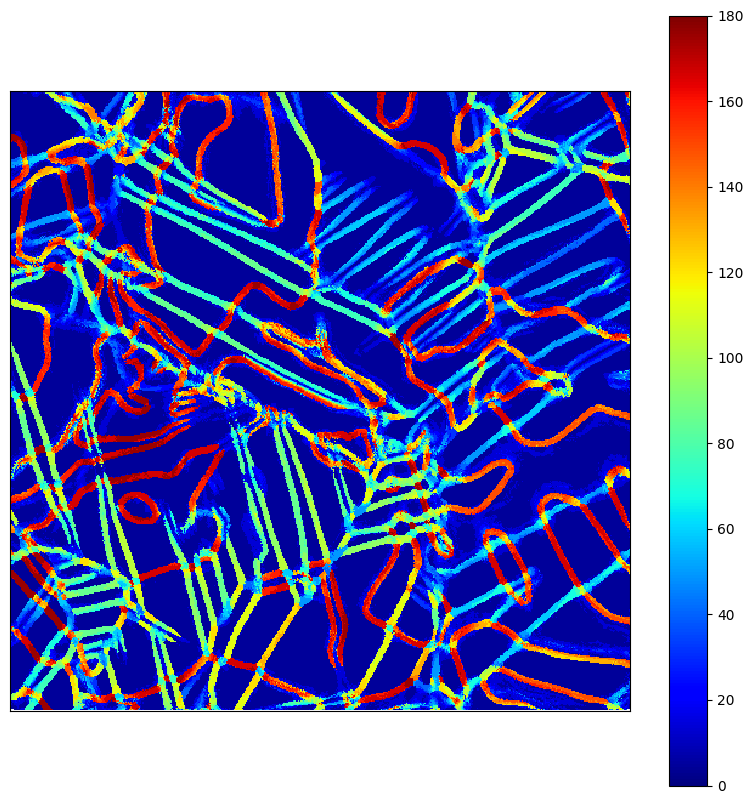

In [ ]:
plt.figure(figsize=(10,10))

plt.imshow(mode_map*180/np.pi, vmin = 0, vmax = 180, cmap = 'jet', interpolation = 'none')
plt.xticks([])
plt.yticks([])
plt.colorbar()

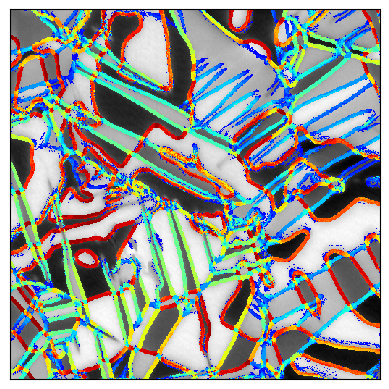

In [ ]:

U_mag = np.sqrt(np.abs(ux)**2+np.abs(uy)**2+np.abs(uz)**2)
background_img = np.real(uz).copy()

angle_deg = mode_map * 180 / np.pi

jet_zero_transparent = jet_with_zero_transparent()

plt.imshow(background_img, cmap='binary_r', interpolation='none')

plt.imshow(angle_deg, vmin=0, vmax=180,
           cmap=jet_zero_transparent, interpolation='none')

plt.xticks([])
plt.yticks([])
#plt.colorbar(label="Angle (°)")
plt.show()


In [ ]:
import numpy as np
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

# Characteristic angle (domain-wall strength)
angle_deg = mode_map * 180 / np.pi
char_angle = np.abs(angle_deg - 180)   # 0 = strong wall, 180 = domain

# Flatten & mask
mask = (~np.isnan(char_angle) &
        ~np.isnan(rough_map) &     # Use rough_map from qVrMWbY1Qg3J
        ~np.isnan(thick_map) &     # Use thick_map from qVrMWbY1Qg3J
        ~np.isnan(curv_map))      # Use curv_map from qVrMWbY1Qg3J

A = char_angle[mask]
R = rough_map[mask]            # Use rough_map from qVrMWbY1Qg3J
T = thick_map[mask]            # Use thick_map from qVrMWbY1Qg3J
C = curv_map[mask]             # Use curv_map from qVrMWbY1Qg3J

In [ ]:
print("Spearman correlations (Characteristic Angle):")
print("Angle – Roughness :", spearmanr(A, R))
print("Angle – Thickness :", spearmanr(A, T))
print("Angle – Curvature :", spearmanr(A, C))


Spearman correlations (Characteristic Angle):
Angle – Roughness : SignificanceResult(statistic=np.float64(-0.35933549252492497), pvalue=np.float64(0.0))
Angle – Thickness : SignificanceResult(statistic=np.float64(-0.3344396281336396), pvalue=np.float64(0.0))
Angle – Curvature : SignificanceResult(statistic=np.float64(-0.07068243625262875), pvalue=np.float64(2.375277904977204e-286))


In [ ]:
# Angle bins
bins = np.linspace(0, 180, 13)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

mean_R, mean_T, mean_C = [], [], []

for i in range(len(bins) - 1):
    m = (A >= bins[i]) & (A < bins[i+1])
    mean_R.append(np.nanmean(R[m]))
    mean_T.append(np.nanmean(T[m]))
    mean_C.append(np.nanmean(C[m]))

mean_R = np.array(mean_R)
mean_T = np.array(mean_T)
mean_C = np.array(mean_C)


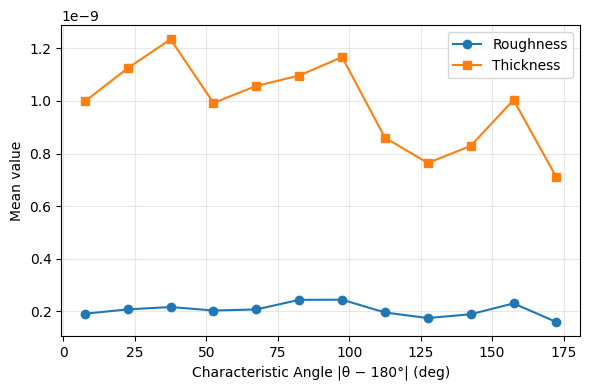

In [ ]:
plt.figure(figsize=(6,4))

plt.plot(bin_centers, mean_R, 'o-', label='Roughness')
plt.plot(bin_centers, mean_T, 's-', label='Thickness')

plt.xlabel('Characteristic Angle |θ − 180°| (deg)')
plt.ylabel('Mean value')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


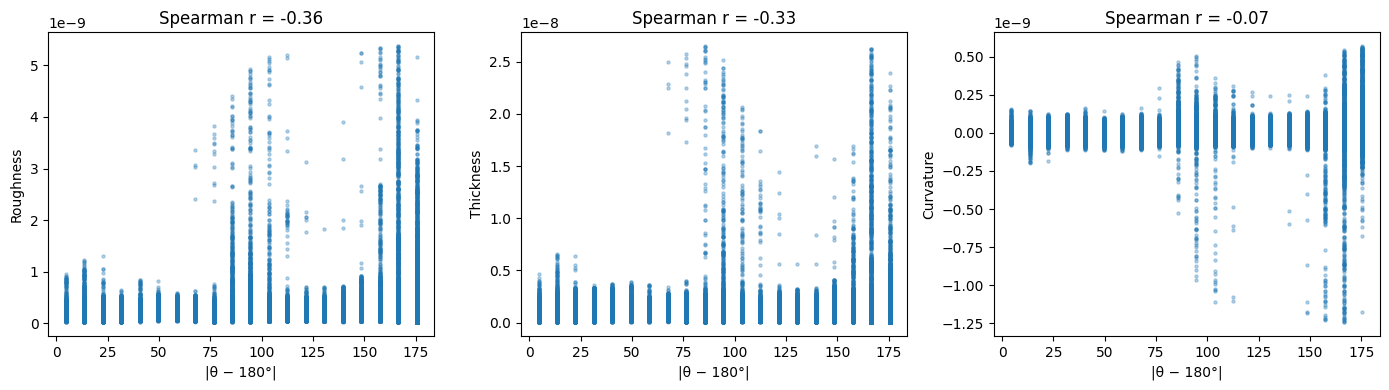

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(14,4))

axs[0].scatter(A, R, s=5, alpha=0.3)
axs[0].set_xlabel('|θ − 180°|')
axs[0].set_ylabel('Roughness')
axs[0].set_title(f'Spearman r = {spearmanr(A,R)[0]:.2f}')

axs[1].scatter(A, T, s=5, alpha=0.3)
axs[1].set_xlabel('|θ − 180°|')
axs[1].set_ylabel('Thickness')
axs[1].set_title(f'Spearman r = {spearmanr(A,T)[0]:.2f}')

axs[2].scatter(A, C, s=5, alpha=0.3)
axs[2].set_xlabel('|θ − 180°|')
axs[2].set_ylabel('Curvature')
axs[2].set_title(f'Spearman r = {spearmanr(A,C)[0]:.2f}')

plt.tight_layout()
plt.show()
plt.tight_layout()




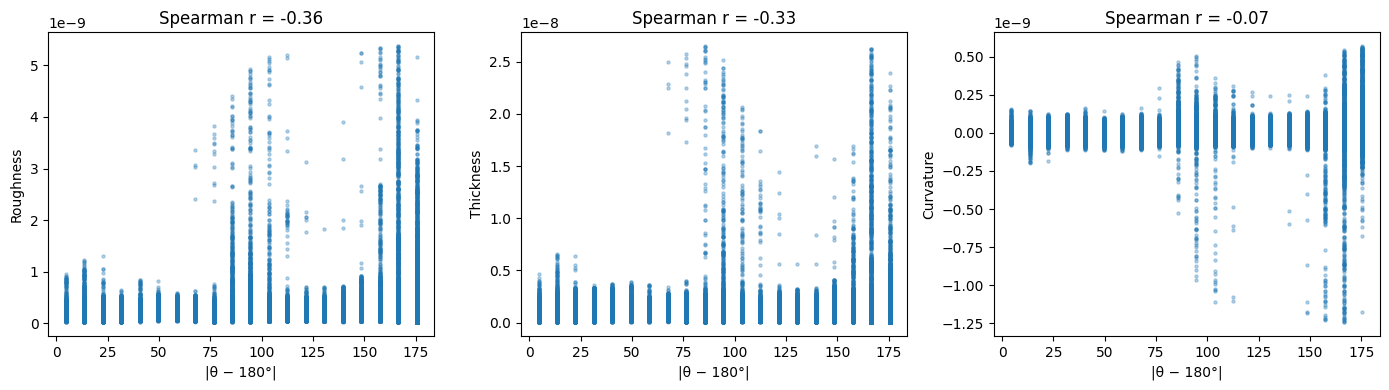

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(14,4))

axs[0].scatter(A, R, s=5, alpha=0.3)
axs[0].set_xlabel('|θ − 180°|')
axs[0].set_ylabel('Roughness')
axs[0].set_title(f'Spearman r = {spearmanr(A,R)[0]:.2f}')

axs[1].scatter(A, T, s=5, alpha=0.3)
axs[1].set_xlabel('|θ − 180°|')
axs[1].set_ylabel('Thickness')
axs[1].set_title(f'Spearman r = {spearmanr(A,T)[0]:.2f}')

axs[2].scatter(A, C, s=5, alpha=0.3)
axs[2].set_xlabel('|θ − 180°|')
axs[2].set_ylabel('Curvature')
axs[2].set_title(f'Spearman r = {spearmanr(A,C)[0]:.2f}')

plt.tight_layout()

# SAVE
fig.savefig('/content/drive/MyDrive/Hackathon2025/angle_scatter.png',
            dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
wall = A < 30        # strong domain walls
domain = A > 150    # uniform domains

print("Wall regions:")
print(" Roughness–Thickness:", spearmanr(R[wall], T[wall]))

print("\nDomain regions:")
print(" Roughness–Thickness:", spearmanr(R[domain], T[domain]))


Wall regions:
 Roughness–Thickness: SignificanceResult(statistic=np.float64(0.5293885148512767), pvalue=np.float64(0.0))

Domain regions:
 Roughness–Thickness: SignificanceResult(statistic=np.float64(0.5178661367238082), pvalue=np.float64(0.0))


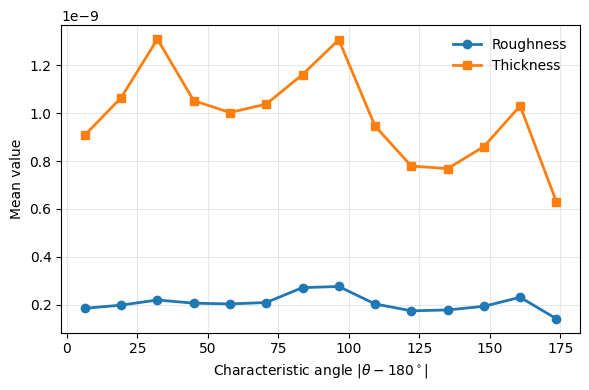

In [ ]:
plt.figure(figsize=(6,4))

plt.plot(bin_centers, mean_R, 'o-', lw=2, label='Roughness')
plt.plot(bin_centers, mean_T, 's-', lw=2, label='Thickness')

plt.xlabel(r'Characteristic angle $|\theta - 180^\circ|$')
plt.ylabel('Mean value')
plt.legend(frameon=False)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()



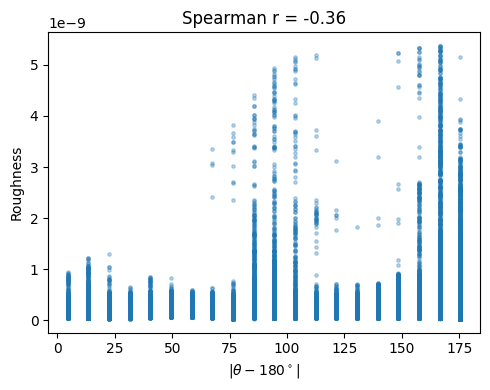

In [ ]:
fig, ax = plt.subplots(figsize=(5,4))

ax.scatter(A, R, s=6, alpha=0.3)
ax.set_xlabel(r'$|\theta - 180^\circ|$')
ax.set_ylabel('Roughness')

rval = spearmanr(A, R)[0]
ax.set_title(f'Spearman r = {rval:.2f}')

plt.tight_layout()
plt.show()


/tmp/ipython-input-1670744745.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Walls', 'Domains'], showfliers=False)


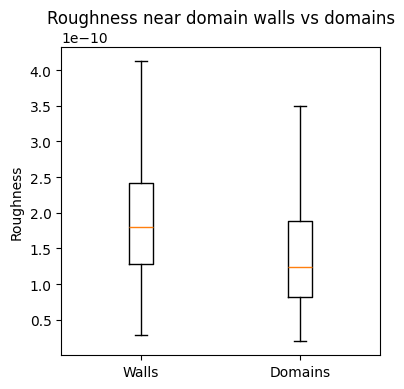

In [ ]:
data = [R[wall], R[domain]]

plt.figure(figsize=(4,4))
plt.boxplot(data, labels=['Walls', 'Domains'], showfliers=False)

plt.ylabel('Roughness')
plt.title('Roughness near domain walls vs domains')

plt.tight_layout()
plt.show()


/tmp/ipython-input-1412474641.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Walls', 'Domains'], showfliers=False)


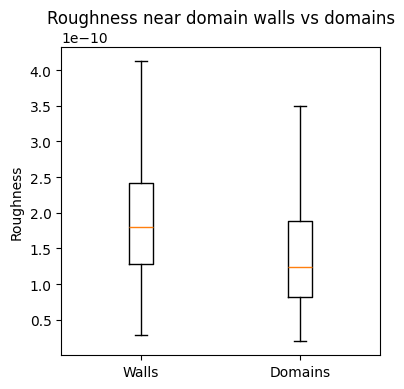

In [ ]:
data = [R[wall], R[domain]]

plt.figure(figsize=(4,4))
plt.boxplot(data, labels=['Walls', 'Domains'], showfliers=False)

plt.ylabel('Roughness')
plt.title('Roughness near domain walls vs domains')

plt.tight_layout()

# SAVE
plt.savefig('/content/drive/MyDrive/Hackathon2025/roughness_wall_vs_domain.png',
            dpi=300, bbox_inches='tight')

plt.show()


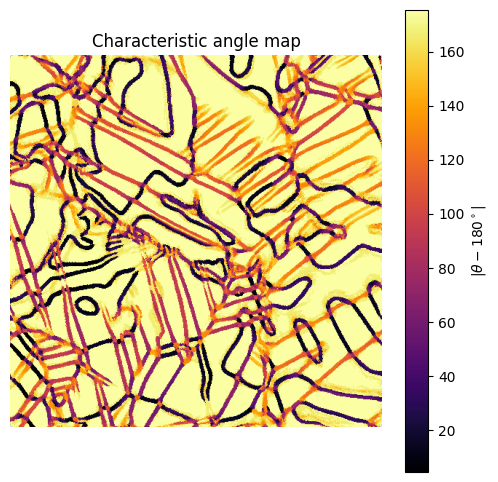

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(char_angle, cmap='inferno')
plt.colorbar(label=r'$|\theta - 180^\circ|$')
plt.axis('off')
plt.title('Characteristic angle map')
plt.show()


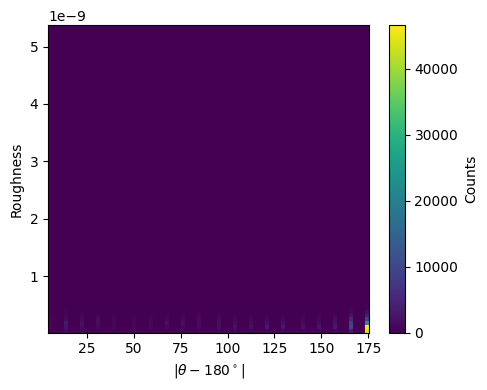

In [ ]:
plt.figure(figsize=(5,4))
plt.hist2d(A, R, bins=80, cmap='viridis')
plt.colorbar(label='Counts')
plt.xlabel(r'$|\theta - 180^\circ|$')
plt.ylabel('Roughness')
plt.tight_layout()
plt.show()


In [ ]:
# Characteristic angle
angle_deg = mode_map * 180 / np.pi
char_angle = np.abs(angle_deg - 180)

# Masks
wall_mask   = char_angle < 30     # strong domain walls
domain_mask = char_angle > 150    # uniform domains


In [ ]:
R_wall = rough_map[wall_mask]
R_dom  = rough_map[domain_mask]

T_wall = thick_map[wall_mask]
T_dom  = thick_map[domain_mask]

C_wall = curv_map[wall_mask]
C_dom  = curv_map[domain_mask]


/tmp/ipython-input-3534476077.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([R_wall, R_dom],


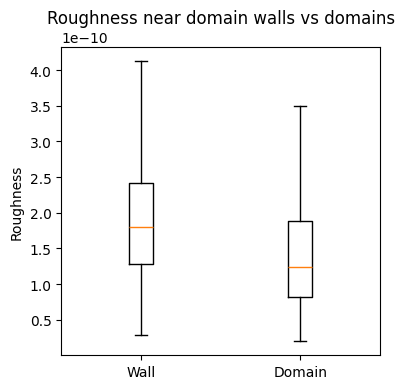

In [ ]:
plt.figure(figsize=(4,4))
plt.boxplot([R_wall, R_dom],
            labels=['Wall', 'Domain'],
            showfliers=False)

plt.ylabel('Roughness')
plt.title('Roughness near domain walls vs domains')
plt.tight_layout()
plt.show()


/tmp/ipython-input-3930541095.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([T_wall, T_dom],


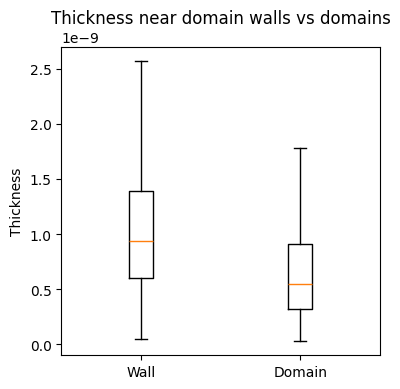

In [ ]:
plt.figure(figsize=(4,4))
plt.boxplot([T_wall, T_dom],
            labels=['Wall', 'Domain'],
            showfliers=False)

plt.ylabel('Thickness')
plt.title('Thickness near domain walls vs domains')
plt.tight_layout()
plt.show()


/tmp/ipython-input-1812201339.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([T_wall, T_dom],


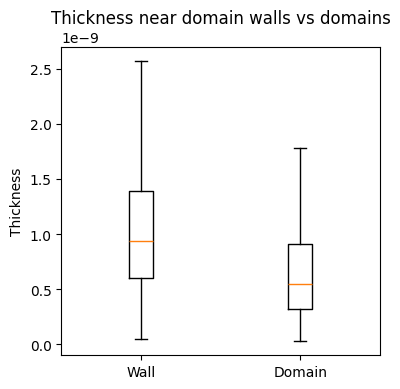

In [ ]:
plt.figure(figsize=(4,4))
plt.boxplot([T_wall, T_dom],
            labels=['Wall', 'Domain'],
            showfliers=False)

plt.ylabel('Thickness')
plt.title('Thickness near domain walls vs domains')
plt.tight_layout()

# SAVE
plt.savefig('/content/drive/MyDrive/Hackathon2025/thickness_wall_vs_domain.png',
            dpi=300, bbox_inches='tight')

plt.show()


/tmp/ipython-input-2024771585.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([C_wall, C_dom],


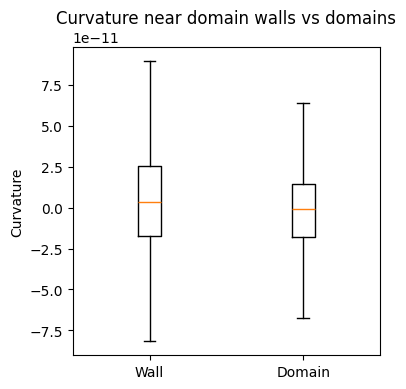

In [ ]:
plt.figure(figsize=(4,4))
plt.boxplot([C_wall, C_dom],
            labels=['Wall', 'Domain'],
            showfliers=False)

plt.ylabel('Curvature')
plt.title('Curvature near domain walls vs domains')
plt.tight_layout()
plt.show()


/tmp/ipython-input-2898532989.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([C_wall, C_dom],


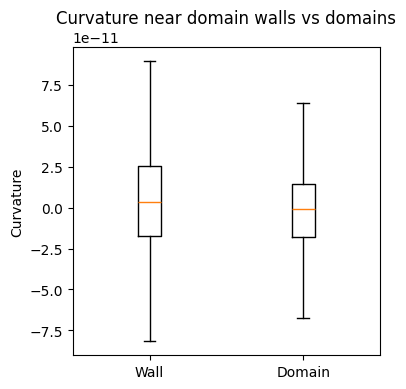

In [ ]:
plt.figure(figsize=(4,4))
plt.boxplot([C_wall, C_dom],
            labels=['Wall', 'Domain'],
            showfliers=False)

plt.ylabel('Curvature')
plt.title('Curvature near domain walls vs domains')
plt.tight_layout()

# SAVE
plt.savefig('/content/drive/MyDrive/Hackathon2025/curvature_wall_vs_domain.png',
            dpi=300, bbox_inches='tight')

plt.show()


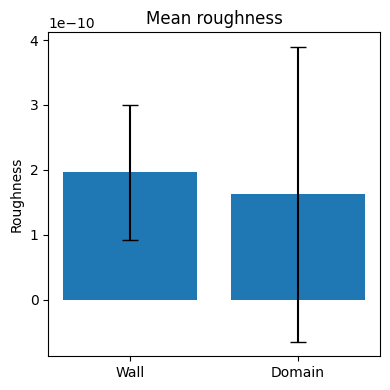

In [ ]:
labels = ['Wall', 'Domain']

means_R = [np.nanmean(R_wall), np.nanmean(R_dom)]
std_R   = [np.nanstd(R_wall),  np.nanstd(R_dom)]

plt.figure(figsize=(4,4))
plt.bar(labels, means_R, yerr=std_R, capsize=6)
plt.ylabel('Roughness')
plt.title('Mean roughness')
plt.tight_layout()
plt.show()


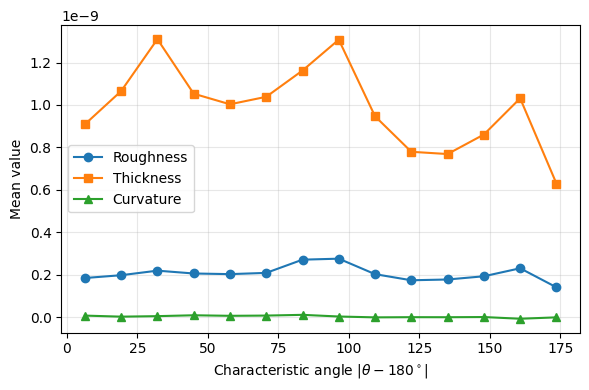

In [ ]:
bins = np.linspace(0, 180, 15)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

mean_R, mean_T, mean_C = [], [], []

for i in range(len(bins)-1):
    m = (char_angle >= bins[i]) & (char_angle < bins[i+1])
    mean_R.append(np.nanmean(rough_map[m]))
    mean_T.append(np.nanmean(thick_map[m]))
    mean_C.append(np.nanmean(curv_map[m]))

plt.figure(figsize=(6,4))
plt.plot(bin_centers, mean_R, 'o-', label='Roughness')
plt.plot(bin_centers, mean_T, 's-', label='Thickness')
plt.plot(bin_centers, mean_C, '^-', label='Curvature')

plt.xlabel(r'Characteristic angle $|\theta - 180^\circ|$')
plt.ylabel('Mean value')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

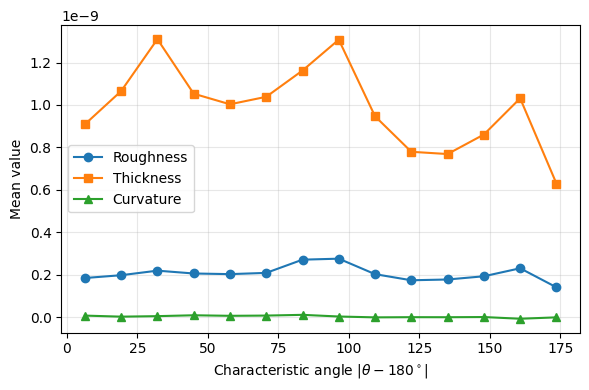

In [ ]:
bins = np.linspace(0, 180, 15)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

mean_R, mean_T, mean_C = [], [], []

for i in range(len(bins)-1):
    m = (char_angle >= bins[i]) & (char_angle < bins[i+1])
    mean_R.append(np.nanmean(rough_map[m]))
    mean_T.append(np.nanmean(thick_map[m]))
    mean_C.append(np.nanmean(curv_map[m]))

plt.figure(figsize=(6,4))
plt.plot(bin_centers, mean_R, 'o-', label='Roughness')
plt.plot(bin_centers, mean_T, 's-', label='Thickness')
plt.plot(bin_centers, mean_C, '^-', label='Curvature')

plt.xlabel(r'Characteristic angle $|\theta - 180^\circ|$')
plt.ylabel('Mean value')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# SAVE
plt.savefig('/content/drive/MyDrive/Hackathon2025/mean_properties_vs_angle.png',
            dpi=300, bbox_inches='tight')

plt.show()


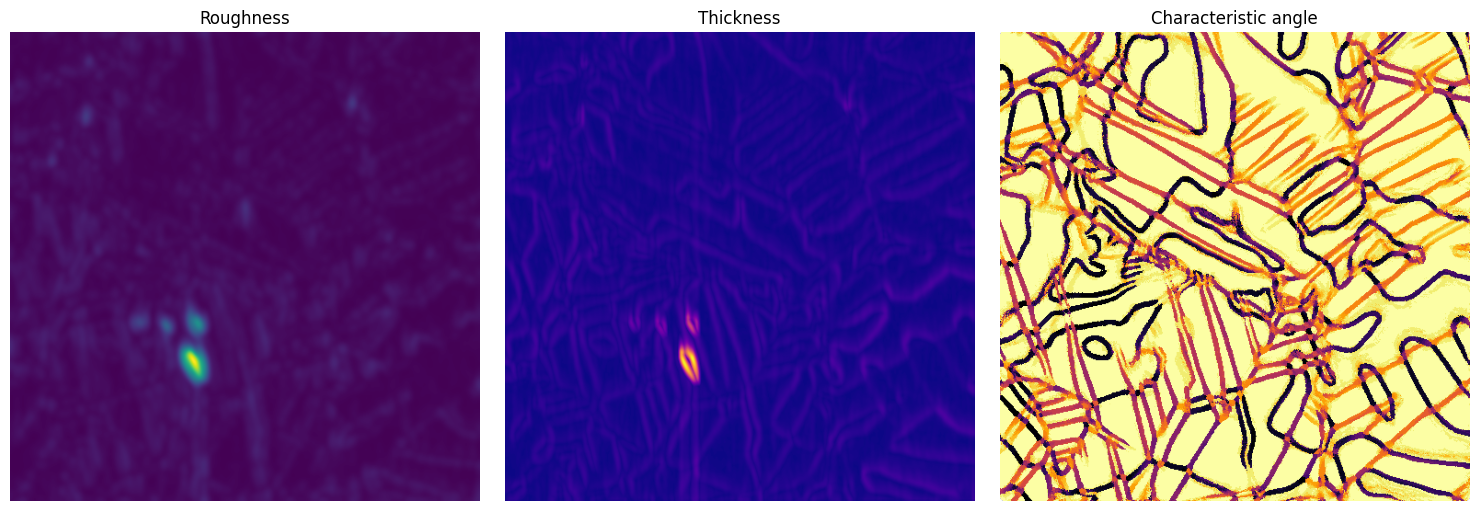

In [ ]:
bins = np.linspace(0, 180, 15)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

mean_R, mean_T, mean_C = [], [], []

for i in range(len(bins)-1):
    m = (char_angle >= bins[i]) & (char_angle < bins[i+1])
    mean_R.append(np.nanmean(rough_map[m]))
    mean_T.append(np.nanmean(thick_map[m]))
    mean_C.append(np.nanmean(curv_map[m]))

plt.figure(figsize=(6,4))
plt.plot(bin_centers, mean_R, 'o-', label='Roughness')
plt.plot(bin_centers, mean_T, 's-', label='Thickness')
plt.plot(bin_centers, mean_C, '^-', label='Curvature')

plt.xlabel(r'Characteristic angle $|\theta - 180^\circ|$')
plt.ylabel('Mean value')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()